In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_column', None)

In [2]:
df=pd.read_excel('Sales Dataset.xlsx')
df.head()

,Opportunity ID,Technology\nPrimary,City,B2B Sales Medium,Sales Velocity,Opportunity Status,Sales Stage Iterations,Opportunity Size (USD),Client Revenue Sizing,Client Employee Sizing,Business from Client Last Year,Compete Intel,Opportunity Sizing
0,N00000001,ERP Implementation,Bengaluru,Marketing,76,Won,13,0,More than 1M,More than 25K,0 (No business),Unknown,10K or less
1,N00000002,ERP Implementation,Delhi,Enterprise Sellers,63,Loss,2,0,250K to 500K,More than 25K,0 (No business),Unknown,10K or less
2,N00000003,Technical Business Solutions,Delhi,Enterprise Sellers,24,Won,7,7750,100K or less,1K or less,0 (No business),Unknown,10K or less
3,N00000004,Technical Business Solutions,Mumbai,Enterprise Sellers,16,Loss,5,0,100K or less,1K or less,0 (No business),Known,10K or less
4,N00000005,ERP Implementation,Delhi,Enterprise Sellers,69,Loss,11,32886,100K or less,1K or less,0 (No business),Unknown,30K to 40K


In [3]:
df['Opportunity Status'].value_counts()/len(df) *100

Loss    77.408523
Won     22.591477
Name: Opportunity Status, dtype: float64

In [4]:
df=df.rename(columns={'Technology\nPrimary':'Technology'})

In [5]:
df=df.rename(columns={'B2B Sales Medium':'Business Sales Medium','Sales Stage Iterations':'Sales Stage','Opportunity Size (USD)':'Opportunity Size'})

In [6]:
df.head()

,Opportunity ID,Technology,City,Business Sales Medium,Sales Velocity,Opportunity Status,Sales Stage,Opportunity Size,Client Revenue Sizing,Client Employee Sizing,Business from Client Last Year,Compete Intel,Opportunity Sizing
0,N00000001,ERP Implementation,Bengaluru,Marketing,76,Won,13,0,More than 1M,More than 25K,0 (No business),Unknown,10K or less
1,N00000002,ERP Implementation,Delhi,Enterprise Sellers,63,Loss,2,0,250K to 500K,More than 25K,0 (No business),Unknown,10K or less
2,N00000003,Technical Business Solutions,Delhi,Enterprise Sellers,24,Won,7,7750,100K or less,1K or less,0 (No business),Unknown,10K or less
3,N00000004,Technical Business Solutions,Mumbai,Enterprise Sellers,16,Loss,5,0,100K or less,1K or less,0 (No business),Known,10K or less
4,N00000005,ERP Implementation,Delhi,Enterprise Sellers,69,Loss,11,32886,100K or less,1K or less,0 (No business),Unknown,30K to 40K


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78025 entries, 0 to 78024
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Opportunity ID                  78025 non-null  object
 1   Technology                      78025 non-null  object
 2   City                            78025 non-null  object
 3   Business Sales Medium           78025 non-null  object
 4   Sales Velocity                  78025 non-null  int64 
 5   Opportunity Status              78025 non-null  object
 6   Sales Stage                     78025 non-null  int64 
 7   Opportunity Size                78025 non-null  int64 
 8   Client Revenue Sizing           78025 non-null  object
 9   Client Employee Sizing          78025 non-null  object
 10  Business from Client Last Year  78025 non-null  object
 11  Compete Intel                   78025 non-null  object
 12  Opportunity Sizing              78025 non-null

In [8]:
df=df.drop('Opportunity ID',axis=1)

In [9]:
for column in df.columns:
    num_unique_values = df[column].nunique()
    print(f'Number of unique values in {column}: {num_unique_values}')

Number of unique values in Technology: 4
Number of unique values in City: 7
Number of unique values in Business Sales Medium: 5
Number of unique values in Sales Velocity: 138
Number of unique values in Opportunity Status: 2
Number of unique values in Sales Stage: 22
Number of unique values in Opportunity Size: 35275
Number of unique values in Client Revenue Sizing: 5
Number of unique values in Client Employee Sizing: 5
Number of unique values in Business from Client Last Year: 5
Number of unique values in Compete Intel: 3
Number of unique values in Opportunity Sizing: 7


In [10]:
for item in df.columns:
    if df[item].dtype == 'object':
        print(f'{item}')
        print(f'{df[item].value_counts()}')
        print('\n')
    else:
        pass

Technology
ERP Implementation              49810
Technical Business Solutions    27325
Legacy Modernization              609
Analytics                         281
Name: Technology, dtype: int64


City
Mumbai       21020
Delhi        15142
Bengaluru     9552
Hyderabad     9232
Pune          8153
Chennai       7568
Kolkata       7358
Name: City, dtype: int64


Business Sales Medium
Marketing             37262
Enterprise Sellers    34758
Partners               2856
Tele Sales             2530
Online Leads            619
Name: Business Sales Medium, dtype: int64


Opportunity Status
Loss    60398
Won     17627
Name: Opportunity Status, dtype: int64


Client Revenue Sizing
100K or less    59504
More than 1M     5288
250K to 500K     4756
500K to 1M       4636
100K to 250K     3841
Name: Client Revenue Sizing, dtype: int64


Client Employee Sizing
1K or less       59348
More than 25K     5098
5K to 15K         4942
1K to 5K          4528
15K to 25K        4109
Name: Client Employee Sizing, d

In [11]:
cat_columns=[item for item in df.columns if df[item].dtype == object]
num_columns=[col for col in df.columns if df[col].dtype != object]

In [12]:
cat_columns

['Technology',
 'City',
 'Business Sales Medium',
 'Opportunity Status',
 'Client Revenue Sizing',
 'Client Employee Sizing',
 'Business from Client Last Year',
 'Compete Intel',
 'Opportunity Sizing']

In [13]:
num_columns

['Sales Velocity', 'Sales Stage', 'Opportunity Size']

In [14]:
df.isnull().sum()

Technology                        0
City                              0
Business Sales Medium             0
Sales Velocity                    0
Opportunity Status                0
Sales Stage                       0
Opportunity Size                  0
Client Revenue Sizing             0
Client Employee Sizing            0
Business from Client Last Year    0
Compete Intel                     0
Opportunity Sizing                0
dtype: int64

In [15]:
df[df.duplicated()]

,Technology,City,Business Sales Medium,Sales Velocity,Opportunity Status,Sales Stage,Opportunity Size,Client Revenue Sizing,Client Employee Sizing,Business from Client Last Year,Compete Intel,Opportunity Sizing
558,ERP Implementation,Delhi,Enterprise Sellers,89,Loss,3,10000,100K or less,1K or less,0 (No business),Unknown,10K to 20K
559,ERP Implementation,Delhi,Enterprise Sellers,89,Loss,3,10000,100K or less,1K or less,0 (No business),Unknown,10K to 20K
816,Technical Business Solutions,Mumbai,Enterprise Sellers,62,Loss,5,4294,100K or less,1K or less,0 (No business),Unknown,10K or less
943,Technical Business Solutions,Delhi,Enterprise Sellers,83,Loss,2,3100,100K or less,1K or less,0 (No business),Unknown,10K or less
944,Technical Business Solutions,Delhi,Enterprise Sellers,83,Loss,2,3100,100K or less,1K or less,0 (No business),Unknown,10K or less
...,...,...,...,...,...,...,...,...,...,...,...,...
77640,ERP Implementation,Pune,Tele Sales,7,Loss,1,10000,100K or less,1K or less,0 (No business),Unknown,10K to 20K
77676,ERP Implementation,Kolkata,Enterprise Sellers,6,Loss,2,5000,100K or less,1K or less,0 (No business),Unknown,10K or less
77794,ERP Implementation,Pune,Tele Sales,5,Loss,1,10000,100K or less,1K or less,0 (No business),Unknown,10K to 20K
77867,Technical Business Solutions,Kolkata,Marketing,4,Loss,1,0,100K or less,1K or less,0 (No business),Unknown,10K or less


In [16]:
def outlier_detection(df, columns):
    plt.figure(figsize=(20,6))
    sns.boxplot(data=df, x=columns)
    plt.title(f'Box plot for {columns}')

count    78025.000000
mean        43.595348
std         26.585600
min          0.000000
25%         19.000000
50%         43.000000
75%         65.000000
max        210.000000
Name: Sales Velocity, dtype: float64
count    78025.000000
mean         2.955732
std          1.497242
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         23.000000
Name: Sales Stage, dtype: float64
count     78025.000000
mean      30085.664992
std       21169.932617
min           0.000000
25%       13816.000000
50%       29845.000000
75%       43185.000000
max      149981.000000
Name: Opportunity Size, dtype: float64


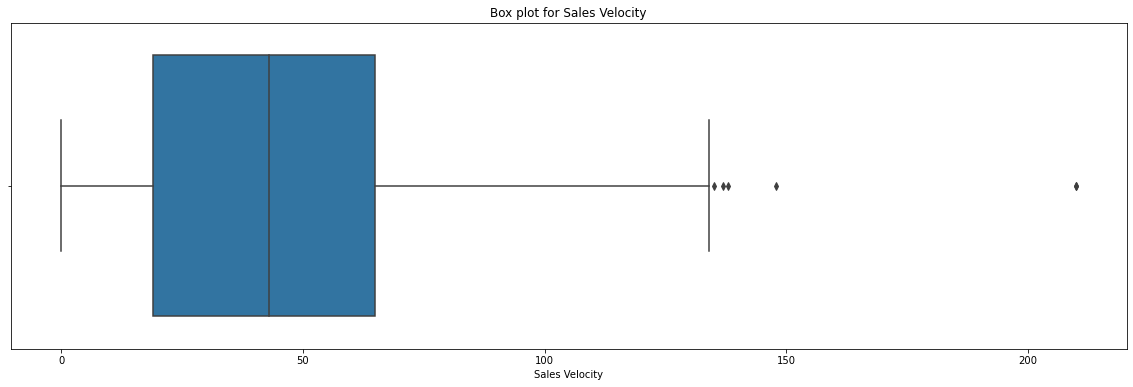

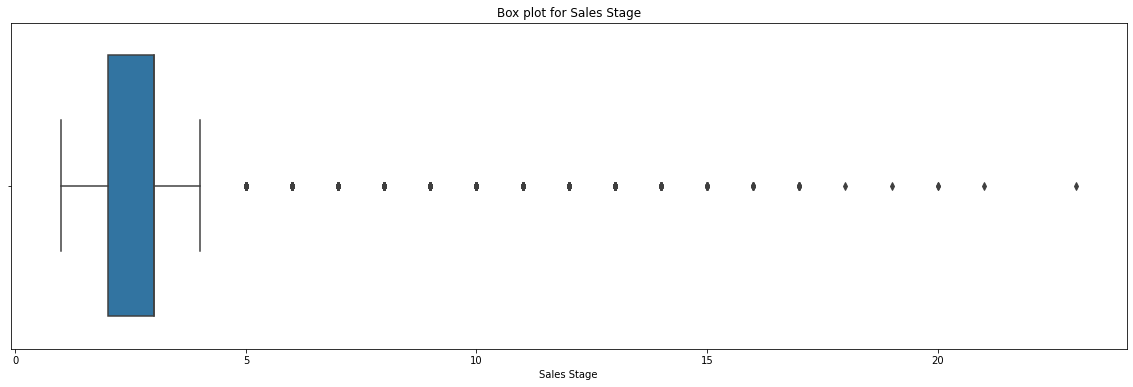

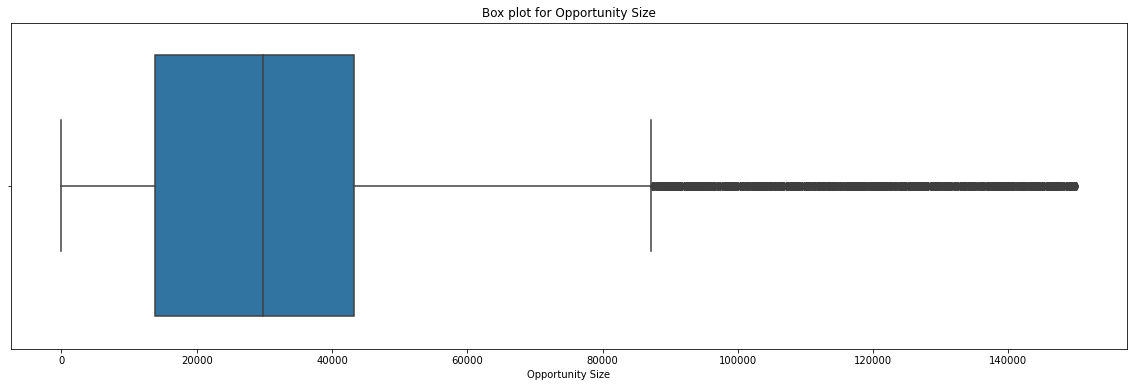

In [17]:
for item in num_columns:
    outlier_detection(df, item)
    print(f'{df[item].describe()}')

In [18]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df< (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)

In [19]:
outliers

0         True
1        False
2         True
3         True
4         True
         ...  
78020    False
78021    False
78022    False
78023    False
78024    False
Length: 78025, dtype: bool

In [20]:
def outlier_threshold(data, col):
    iqr=df[col].quantile(0.75) - df[col].quantile(0.25)
    upper_threshold= df[col].quantile(0.75) + (1.5 * iqr)
    lower_threshold= df[col].quantile(0.25) - (1.5 * iqr)
    df[col]=df[col].clip(lower_threshold, upper_threshold)

In [21]:
outlier_threshold(df, num_columns[0])

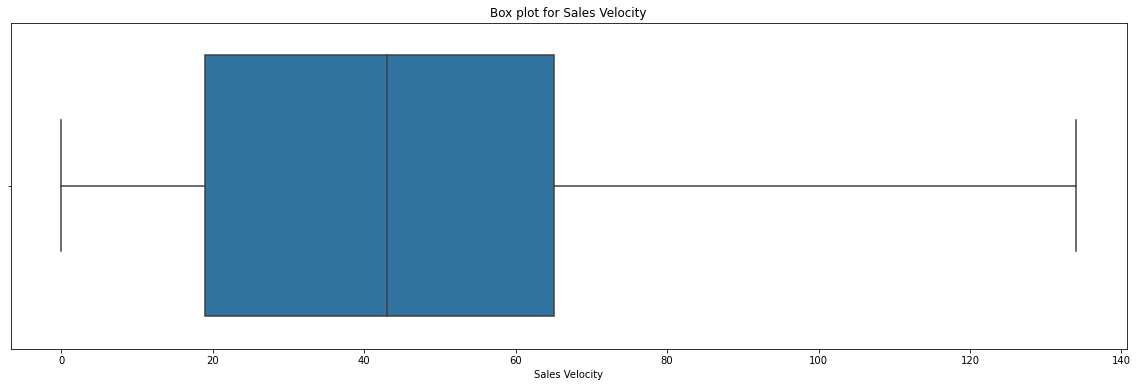

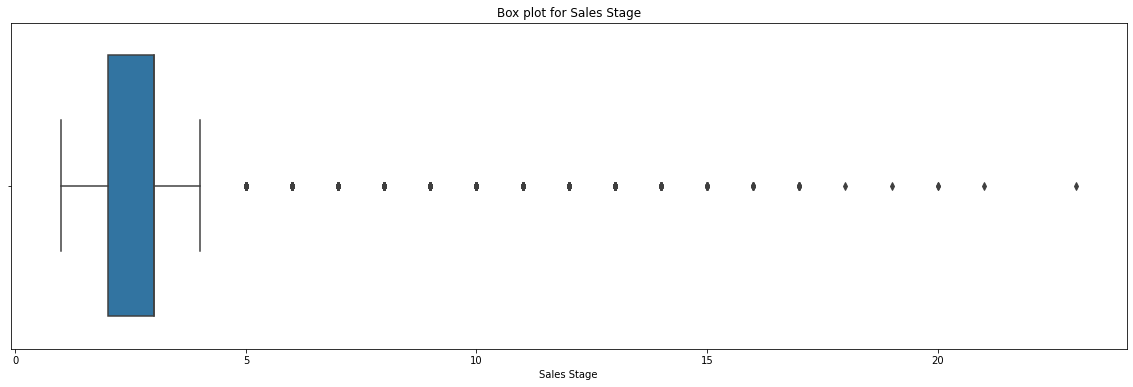

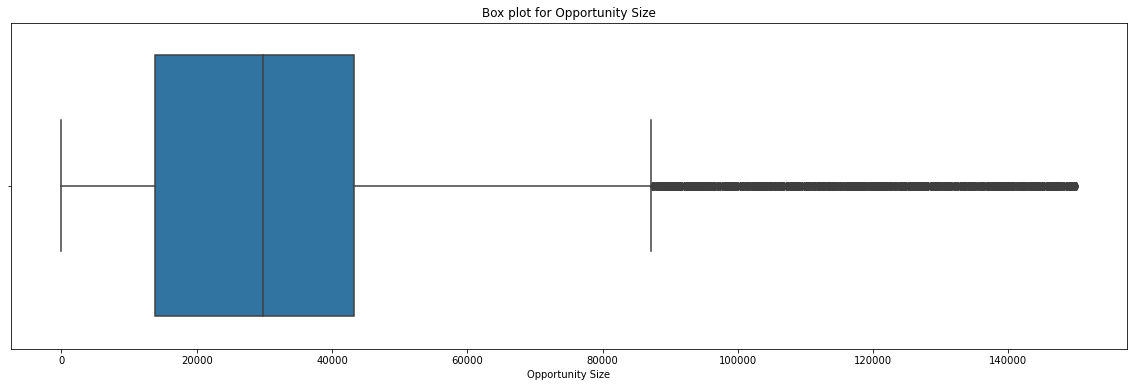

In [22]:
for item in num_columns:
    outlier_detection(df, item)

In [23]:
from scipy.stats import zscore
z_scores = zscore(df['Sales Velocity'])
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3).all(axis=0)

In [24]:
outliers

False

<AxesSubplot:xlabel='Sales Velocity', ylabel='Count'>

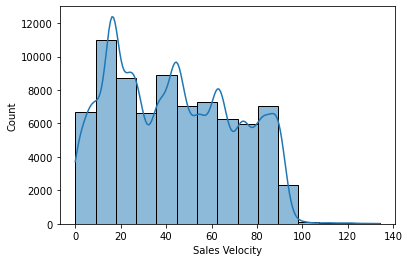

In [25]:
sns.histplot(df['Sales Velocity'], bins=15, kde=True)

In [26]:
def count_plots(df, col):
    plt.figure(figsize=(15,5))
    sns.countplot(df[col])
    plt.title(f'Count plot for {col}')

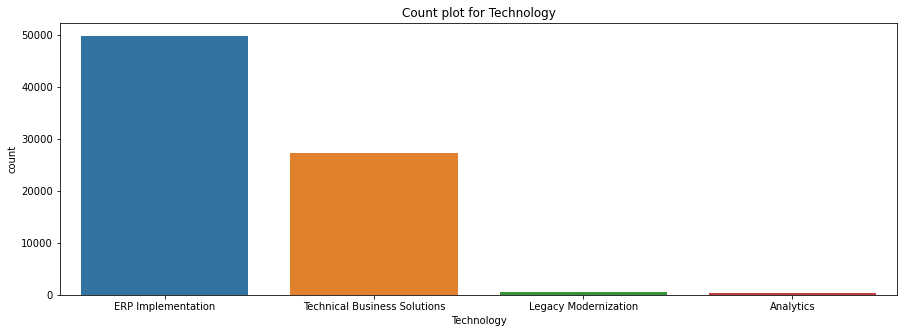

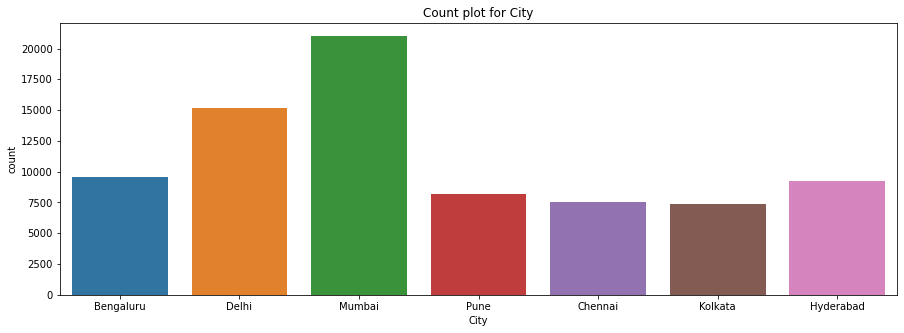

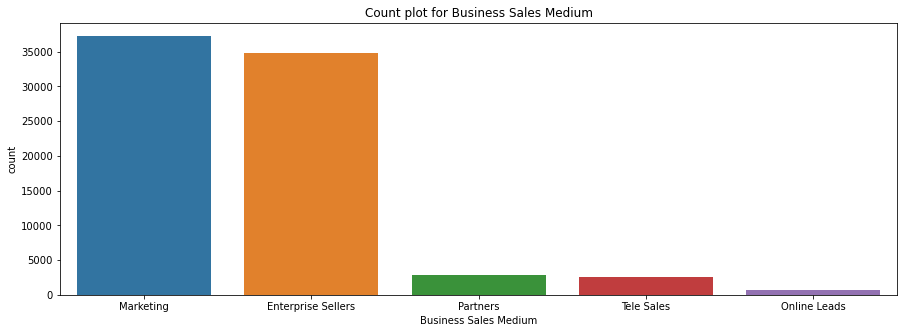

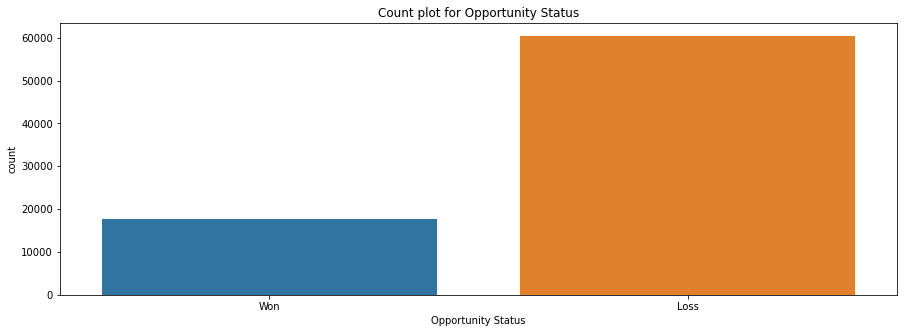

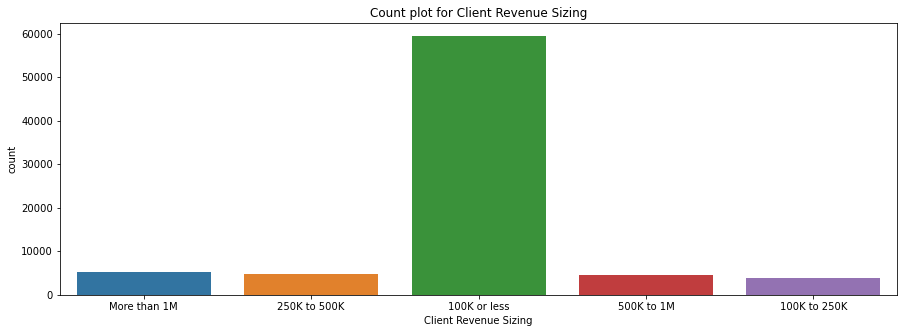

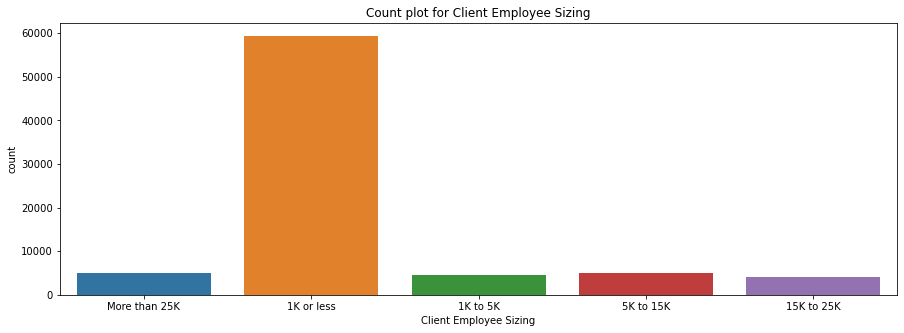

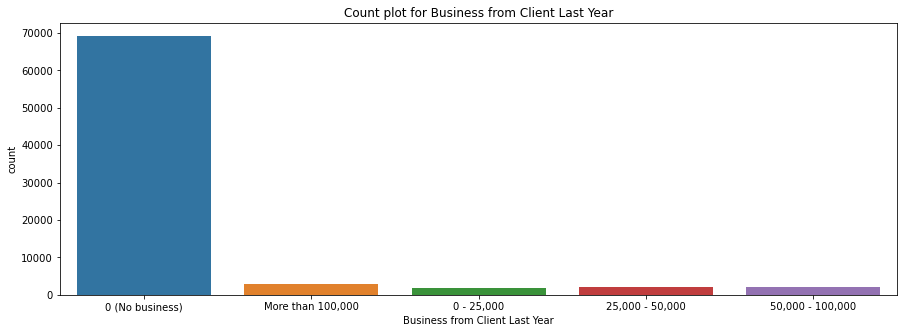

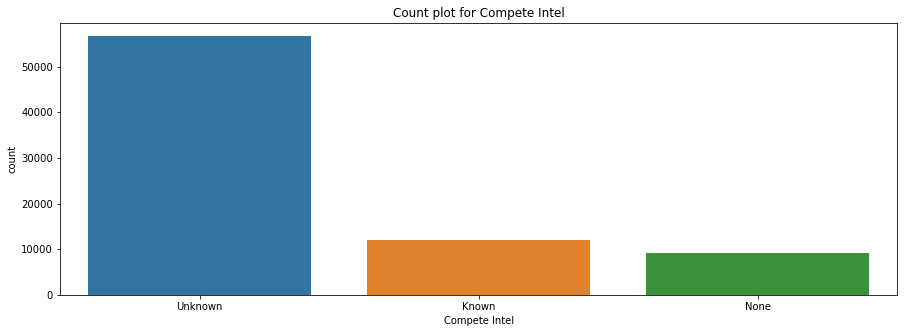

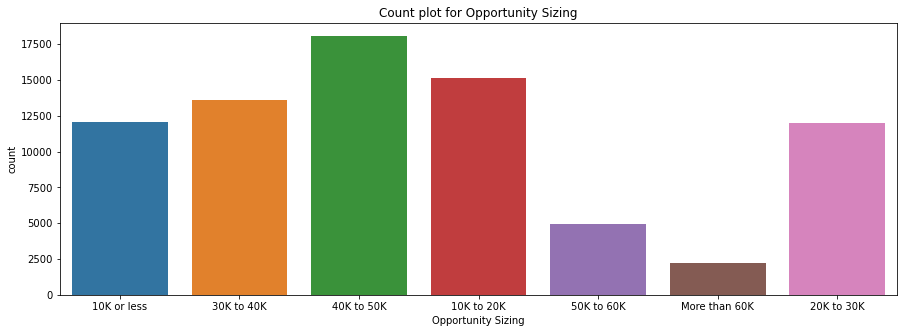

In [27]:
for item in cat_columns:
    count_plots(df, item)

In [28]:
def count(df, col):
    plt.figure(figsize=(15,5))
    sns.countplot(df[col], hue=df['Opportunity Status'])
    plt.title(f'Count plot for {col}')

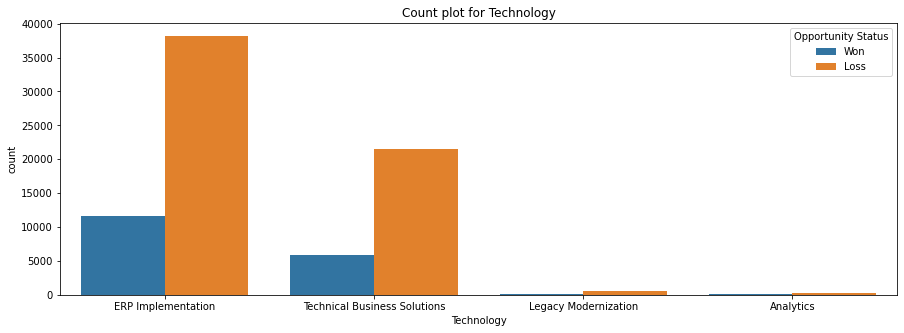

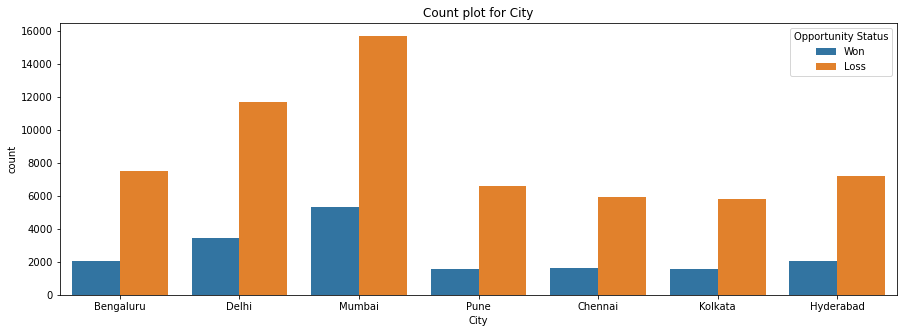

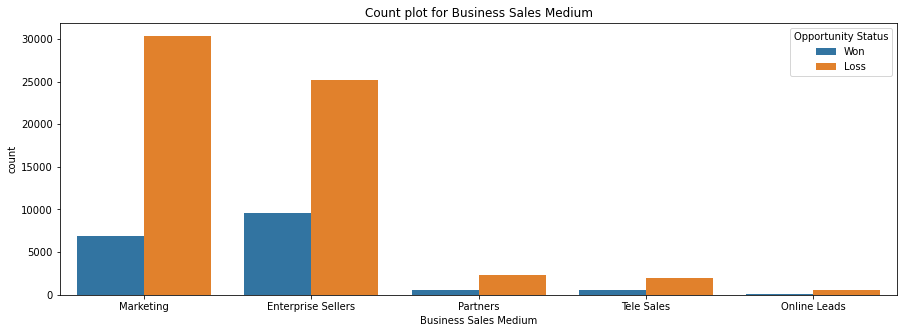

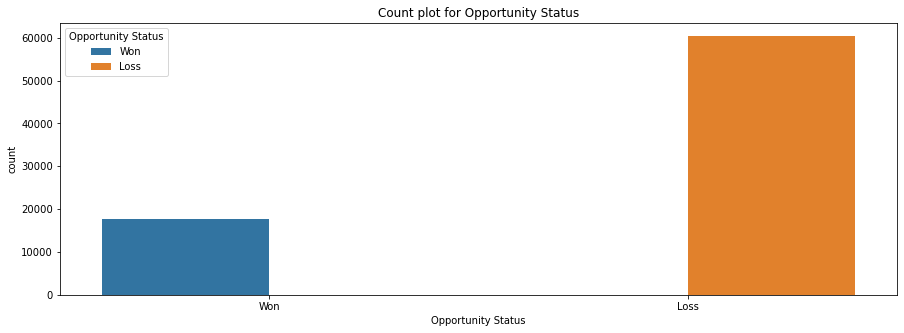

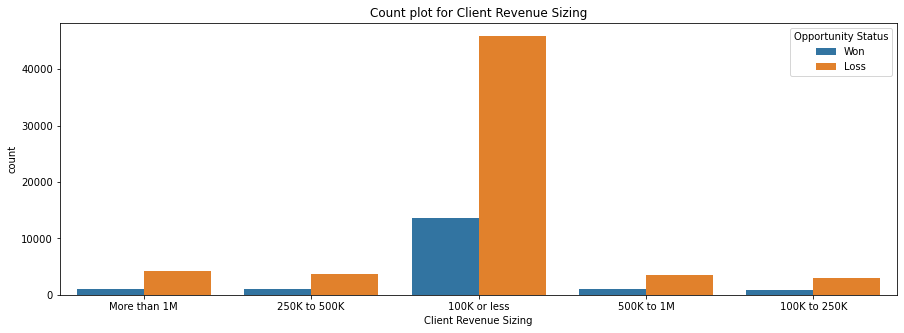

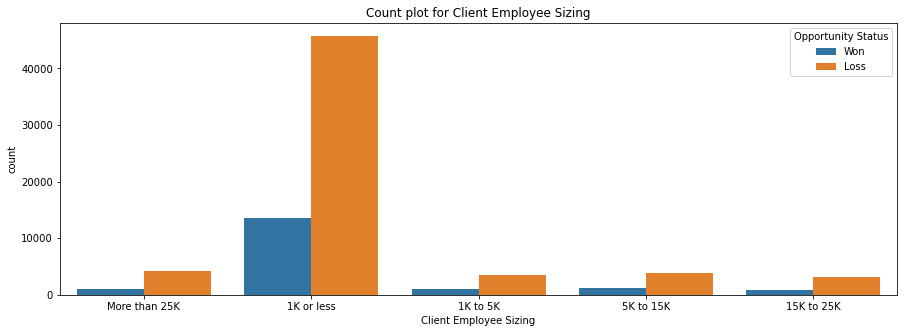

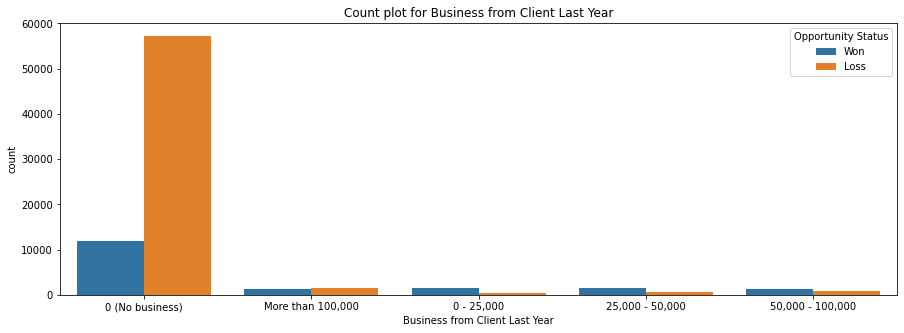

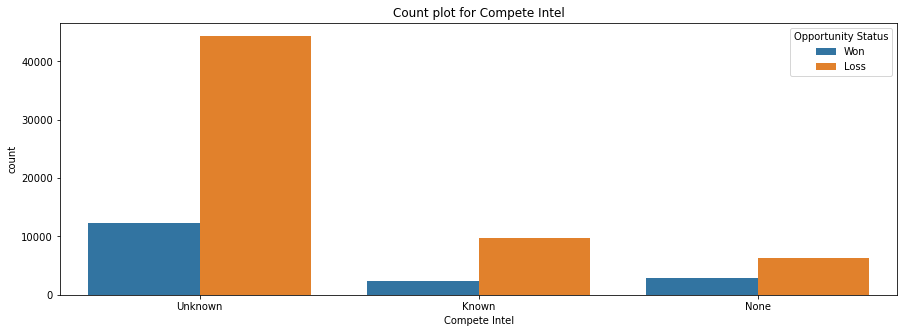

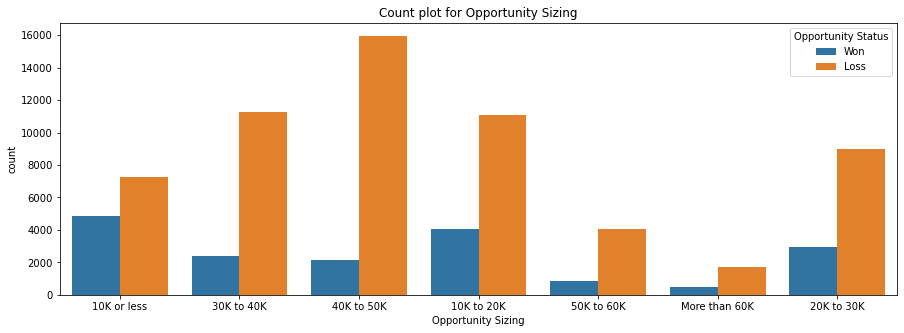

In [29]:
for item in cat_columns:
    count(df, item)

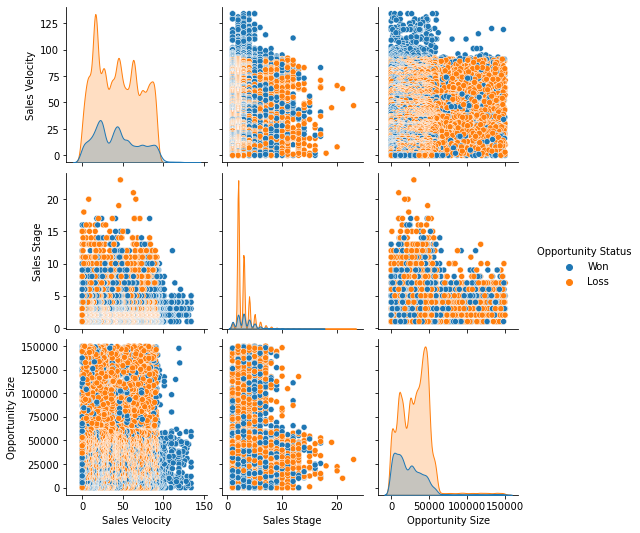

In [30]:
sns.pairplot(df, hue='Opportunity Status')

In [31]:
df.head()

,Technology,City,Business Sales Medium,Sales Velocity,Opportunity Status,Sales Stage,Opportunity Size,Client Revenue Sizing,Client Employee Sizing,Business from Client Last Year,Compete Intel,Opportunity Sizing
0,ERP Implementation,Bengaluru,Marketing,76.0,Won,13,0,More than 1M,More than 25K,0 (No business),Unknown,10K or less
1,ERP Implementation,Delhi,Enterprise Sellers,63.0,Loss,2,0,250K to 500K,More than 25K,0 (No business),Unknown,10K or less
2,Technical Business Solutions,Delhi,Enterprise Sellers,24.0,Won,7,7750,100K or less,1K or less,0 (No business),Unknown,10K or less
3,Technical Business Solutions,Mumbai,Enterprise Sellers,16.0,Loss,5,0,100K or less,1K or less,0 (No business),Known,10K or less
4,ERP Implementation,Delhi,Enterprise Sellers,69.0,Loss,11,32886,100K or less,1K or less,0 (No business),Unknown,30K to 40K


In [32]:
cat_columns

['Technology',
 'City',
 'Business Sales Medium',
 'Opportunity Status',
 'Client Revenue Sizing',
 'Client Employee Sizing',
 'Business from Client Last Year',
 'Compete Intel',
 'Opportunity Sizing']

In [33]:
df1=df.copy()
df1=pd.get_dummies(df1[['Technology','City','Business Sales Medium','Client Revenue Sizing','Client Employee Sizing','Business from Client Last Year','Compete Intel','Opportunity Sizing']], drop_first=True)
df1.head()

,Technology_ERP Implementation,Technology_Legacy Modernization,Technology_Technical Business Solutions,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,City_Pune,Business Sales Medium_Marketing,Business Sales Medium_Online Leads,Business Sales Medium_Partners,Business Sales Medium_Tele Sales,Client Revenue Sizing_100K to 250K,Client Revenue Sizing_250K to 500K,Client Revenue Sizing_500K to 1M,Client Revenue Sizing_More than 1M,Client Employee Sizing_1K or less,Client Employee Sizing_1K to 5K,Client Employee Sizing_5K to 15K,Client Employee Sizing_More than 25K,"Business from Client Last Year_0 - 25,000","Business from Client Last Year_25,000 - 50,000","Business from Client Last Year_50,000 - 100,000","Business from Client Last Year_More than 100,000",Compete Intel_None,Compete Intel_Unknown,Opportunity Sizing_10K to 20K,Opportunity Sizing_20K to 30K,Opportunity Sizing_30K to 40K,Opportunity Sizing_40K to 50K,Opportunity Sizing_50K to 60K,Opportunity Sizing_More than 60K
0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [34]:
df2=df.copy()
df2 = pd.concat([df2, df1], axis=1)
df2.head()

,Technology,City,Business Sales Medium,Sales Velocity,Opportunity Status,Sales Stage,Opportunity Size,Client Revenue Sizing,Client Employee Sizing,Business from Client Last Year,Compete Intel,Opportunity Sizing,Technology_ERP Implementation,Technology_Legacy Modernization,Technology_Technical Business Solutions,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,City_Pune,Business Sales Medium_Marketing,Business Sales Medium_Online Leads,Business Sales Medium_Partners,Business Sales Medium_Tele Sales,Client Revenue Sizing_100K to 250K,Client Revenue Sizing_250K to 500K,Client Revenue Sizing_500K to 1M,Client Revenue Sizing_More than 1M,Client Employee Sizing_1K or less,Client Employee Sizing_1K to 5K,Client Employee Sizing_5K to 15K,Client Employee Sizing_More than 25K,"Business from Client Last Year_0 - 25,000","Business from Client Last Year_25,000 - 50,000","Business from Client Last Year_50,000 - 100,000","Business from Client Last Year_More than 100,000",Compete Intel_None,Compete Intel_Unknown,Opportunity Sizing_10K to 20K,Opportunity Sizing_20K to 30K,Opportunity Sizing_30K to 40K,Opportunity Sizing_40K to 50K,Opportunity Sizing_50K to 60K,Opportunity Sizing_More than 60K
0,ERP Implementation,Bengaluru,Marketing,76.0,Won,13,0,More than 1M,More than 25K,0 (No business),Unknown,10K or less,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,ERP Implementation,Delhi,Enterprise Sellers,63.0,Loss,2,0,250K to 500K,More than 25K,0 (No business),Unknown,10K or less,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,Technical Business Solutions,Delhi,Enterprise Sellers,24.0,Won,7,7750,100K or less,1K or less,0 (No business),Unknown,10K or less,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,Technical Business Solutions,Mumbai,Enterprise Sellers,16.0,Loss,5,0,100K or less,1K or less,0 (No business),Known,10K or less,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,ERP Implementation,Delhi,Enterprise Sellers,69.0,Loss,11,32886,100K or less,1K or less,0 (No business),Unknown,30K to 40K,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [35]:
df2 = df2.drop(['Technology', 'City', 'Business Sales Medium', 'Client Revenue Sizing',
              'Client Employee Sizing', 'Business from Client Last Year',
              'Compete Intel', 'Opportunity Sizing'], axis = 1)
df2.head()

,Sales Velocity,Opportunity Status,Sales Stage,Opportunity Size,Technology_ERP Implementation,Technology_Legacy Modernization,Technology_Technical Business Solutions,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,City_Pune,Business Sales Medium_Marketing,Business Sales Medium_Online Leads,Business Sales Medium_Partners,Business Sales Medium_Tele Sales,Client Revenue Sizing_100K to 250K,Client Revenue Sizing_250K to 500K,Client Revenue Sizing_500K to 1M,Client Revenue Sizing_More than 1M,Client Employee Sizing_1K or less,Client Employee Sizing_1K to 5K,Client Employee Sizing_5K to 15K,Client Employee Sizing_More than 25K,"Business from Client Last Year_0 - 25,000","Business from Client Last Year_25,000 - 50,000","Business from Client Last Year_50,000 - 100,000","Business from Client Last Year_More than 100,000",Compete Intel_None,Compete Intel_Unknown,Opportunity Sizing_10K to 20K,Opportunity Sizing_20K to 30K,Opportunity Sizing_30K to 40K,Opportunity Sizing_40K to 50K,Opportunity Sizing_50K to 60K,Opportunity Sizing_More than 60K
0,76.0,Won,13,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,63.0,Loss,2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,24.0,Won,7,7750,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,16.0,Loss,5,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,69.0,Loss,11,32886,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [36]:
df2['Opportunity Status']=df2['Opportunity Status'].map({'Won':1,'Loss':0})

In [37]:
df2

,Sales Velocity,Opportunity Status,Sales Stage,Opportunity Size,Technology_ERP Implementation,Technology_Legacy Modernization,Technology_Technical Business Solutions,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,City_Pune,Business Sales Medium_Marketing,Business Sales Medium_Online Leads,Business Sales Medium_Partners,Business Sales Medium_Tele Sales,Client Revenue Sizing_100K to 250K,Client Revenue Sizing_250K to 500K,Client Revenue Sizing_500K to 1M,Client Revenue Sizing_More than 1M,Client Employee Sizing_1K or less,Client Employee Sizing_1K to 5K,Client Employee Sizing_5K to 15K,Client Employee Sizing_More than 25K,"Business from Client Last Year_0 - 25,000","Business from Client Last Year_25,000 - 50,000","Business from Client Last Year_50,000 - 100,000","Business from Client Last Year_More than 100,000",Compete Intel_None,Compete Intel_Unknown,Opportunity Sizing_10K to 20K,Opportunity Sizing_20K to 30K,Opportunity Sizing_30K to 40K,Opportunity Sizing_40K to 50K,Opportunity Sizing_50K to 60K,Opportunity Sizing_More than 60K
0,76.0,1,13,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,63.0,0,2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,24.0,1,7,7750,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,16.0,0,5,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,69.0,0,11,32886,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78020,0.0,0,2,53258,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
78021,0.0,1,1,40804,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
78022,0.0,0,2,39241,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
78023,0.0,0,2,44432,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


1.Most of the Sales Medium are via MArketing and Enterprise Sellers</br>
2.

In [38]:
X=df2.drop('Opportunity Status', axis=1)
y = df2['Opportunity Status']

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=125)

In [40]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_train[['Sales Velocity','Sales Stage','Opportunity Size']] = scaler.fit_transform(X_train[['Sales Velocity','Sales Stage','Opportunity Size']])


In [41]:
X_test[['Sales Velocity','Sales Stage','Opportunity Size']] = scaler.fit_transform(X_test[['Sales Velocity','Sales Stage','Opportunity Size']])


In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model=DecisionTreeClassifier()

In [43]:
# fit the model with the training data
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [44]:
# predict the target on the train dataset
predict_train = model.predict(X_train)
predict_train

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [45]:
acc=accuracy_score(y_train, predict_train)
print('accuracy_score on train dataset : ', acc)

accuracy_score on train dataset :  0.9990112968489664


In [46]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train, predict_train )
print(confusion)

[[42258     4]
 [   50 12305]]


In [47]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train,predict_train)



0.9996750345275814

In [48]:
recall_score(y_train,predict_train)

0.9959530554431404

In [49]:
predict_test = model.predict(X_test)
print('Target on test data\n\n',predict_test)

Target on test data

 [1 1 0 ... 1 0 0]


In [50]:
confusion2 = metrics.confusion_matrix(y_test, predict_test )
print(confusion2)

[[15397  2739]
 [ 2268  3004]]


In [51]:
testaccuracy= accuracy_score(y_test,predict_test)
testaccuracy

0.7860987696514012

### Grid Search CV

In [52]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_dist = {"max_depth": [3, None],
              "max_features": randint(1,50),
              "min_samples_leaf": randint(50,1000),
              "criterion": ["gini", "entropy"]}
#Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()
#Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)
#Fit it to the data
tree_cv.fit(X_train, y_train)
#Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))


Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 8, 'min_samples_leaf': 974}
Best score is 0.7883258439045692


In [ ]:
from math import log2
from numpy import round

def b(p):
    if p == 0 or p == 1:
        return 0
    
    q = 1 - p
    return -(p*log2(p) + q*log2(q))

def entropy(column):
    p = column.value_counts()[0] / column.count()
    return b(p)

initial_entropy = entropy(df["Opportunity Status"])
for name in list(features):
    number_of_values = data_labeled[name].nunique()
    
    if number_of_values == 2:
        df_true = data_labeled[data_labeled[name] == 0]
        df_false = data_labeled[data_labeled[name] == 1]
        
        p = df_true.shape[0] / (data_labeled.shape[0])
        q = 1 - p
        
        entropy_true = entropy(df_true["Churn Status"])
        entropy_false = entropy(df_false["Churn Status"])
        
        gain = initial_entropy - (p*entropy_true + q*entropy_false)
        gain = round(gain, 2)
        
        print(f"{name} has an information gain of {round(gain, 2)}")
        if gain < 0.01:
            features.remove(name)

In [56]:
df.head()

,Technology,City,Business Sales Medium,Sales Velocity,Opportunity Status,Sales Stage,Opportunity Size,Client Revenue Sizing,Client Employee Sizing,Business from Client Last Year,Compete Intel,Opportunity Sizing
0,ERP Implementation,Bengaluru,Marketing,76.0,Won,13,0,More than 1M,More than 25K,0 (No business),Unknown,10K or less
1,ERP Implementation,Delhi,Enterprise Sellers,63.0,Loss,2,0,250K to 500K,More than 25K,0 (No business),Unknown,10K or less
2,Technical Business Solutions,Delhi,Enterprise Sellers,24.0,Won,7,7750,100K or less,1K or less,0 (No business),Unknown,10K or less
3,Technical Business Solutions,Mumbai,Enterprise Sellers,16.0,Loss,5,0,100K or less,1K or less,0 (No business),Known,10K or less
4,ERP Implementation,Delhi,Enterprise Sellers,69.0,Loss,11,32886,100K or less,1K or less,0 (No business),Unknown,30K to 40K


In [1]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

### Finding Best Depth

In [61]:
for i in range(1,10):
    dt=DecisionTreeClassifier(max_depth=i)
    dt.fit(X_train,y_train)
    training_accuracy=accuracy_score(y_train,dt.predict(X_train))
    val_accuracy=cross_val_score(dt,X_train,y_train,cv=10)
    print('Depth:',i, 'Training accuracy:', training_accuracy, "Cross val score:", np.mean(val_accuracy))
     

Depth: 1 Training accuracy: 0.7885640002197118 Cross val score: 0.788564030245157
Depth: 2 Training accuracy: 0.798139773330648 Cross val score: 0.7970412949826777
Depth: 3 Training accuracy: 0.8099675925078272 Cross val score: 0.8086676933089206
Depth: 4 Training accuracy: 0.8168518959298386 Cross val score: 0.8161194679546208
Depth: 5 Training accuracy: 0.8267938553930095 Cross val score: 0.8249446207926503
Depth: 6 Training accuracy: 0.8288994269183587 Cross val score: 0.8267755592718273
Depth: 7 Training accuracy: 0.8303458630096856 Cross val score: 0.8264826095174659
Depth: 8 Training accuracy: 0.8323415786293645 Cross val score: 0.8260065934061513
Depth: 9 Training accuracy: 0.8392991193218229 Cross val score: 0.8300346768346583


### gini index

In [62]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [63]:
y_pred_gini = clf_gini.predict(X_test)

In [64]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8257


In [65]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.8268
Test set score: 0.8257


### criterion entropy

In [66]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [67]:
y_pred_en = clf_en.predict(X_test)

In [68]:
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.8166


In [69]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [70]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))


Training-set accuracy score: 0.8193


In [71]:

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.8193
Test set score: 0.8166


In [72]:
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89     18136
           1       0.74      0.28      0.41      5272

    accuracy                           0.82     23408
   macro avg       0.78      0.63      0.65     23408
weighted avg       0.81      0.82      0.78     23408



NameError: name 'X_train' is not defined